UCI Appliances Energy Prediction

In [11]:
import pandas as pd

# Cargar los datos
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv"
data = pd.read_csv(url)

# Exploración inicial
print(data.head())
print(data.info())

                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility

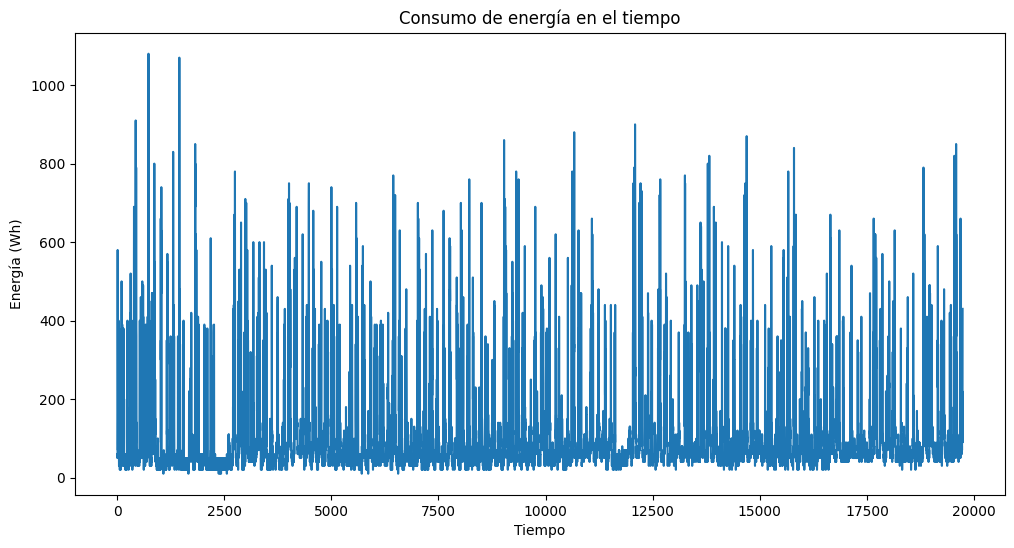

In [12]:
import matplotlib.pyplot as plt

# Visualizar el consumo de energía
data['Appliances'].plot(figsize=(12, 6))
plt.title("Consumo de energía en el tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Energía (Wh)")
plt.show()

In [13]:
# Convertir la columna de tiempo a formato datetime
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')

<Axes: >

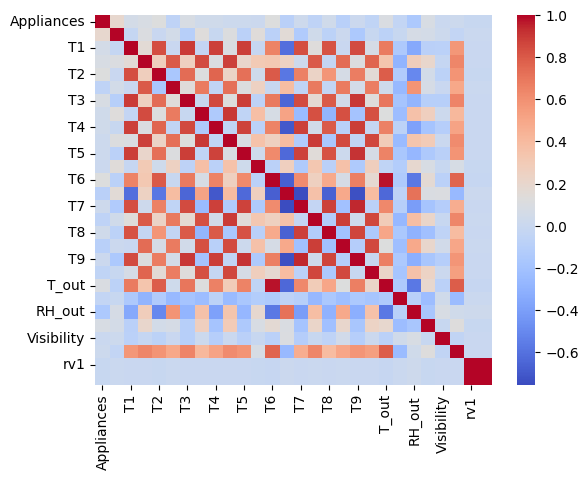

In [14]:
import seaborn as sns

# Matriz de correlación
correlation = data.corr()
sns.heatmap(correlation, annot=False, cmap="coolwarm")

In [15]:
# Selección de características y objetivo
features = data.drop(columns=['Appliances'])
target = data['Appliances']

# Normalización de los datos
from sklearn.preprocessing import StandardScaler

scaler_features = StandardScaler()
scaler_target = StandardScaler()

features_scaled = scaler_features.fit_transform(features)
target_scaled = scaler_target.fit_transform(target.values.reshape(-1, 1))

In [16]:
print(f"Media de las características escaladas: {features_scaled.mean(axis=0)}")
print(f"Desviación estándar de las características escaladas: {features_scaled.std(axis=0)}")
print(f"Media del objetivo escalado: {target_scaled.mean()}")
print(f"Desviación estándar del objetivo escalado: {target_scaled.std()}")

Media de las características escaladas: [ 0.00000000e+00  3.41031710e-15 -9.21707324e-17 -2.76512197e-16
  9.15946653e-16 -1.01387806e-15  2.04791846e-15 -7.83451225e-16
  7.08562505e-16  3.22597563e-16 -1.03692074e-16  4.60853662e-17
  1.15213415e-16  1.61298782e-15  9.79314032e-16  1.65907318e-15
  3.97486283e-16  8.29536591e-16 -1.16365550e-15 -1.38256099e-16
  1.30997653e-14 -2.18905489e-16  1.03692074e-16  1.15213415e-17
  9.21707324e-17  4.74355234e-17  4.74355234e-17]
Desviación estándar de las características escaladas: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1.]
Media del objetivo escalado: 3.060356348599368e-17
Desviación estándar del objetivo escalado: 0.9999999999999999


In [17]:
import numpy as np

sequence_length = 72  # Ventana de pasos

def create_sequences(features, target, seq_length):
    X, Y = [], []
    for i in range(len(features) - seq_length):
        X.append(features[i:i+seq_length])
        Y.append(target[i+seq_length])
    return np.array(X), np.array(Y)

X, Y = create_sequences(features_scaled, target_scaled, sequence_length)

In [18]:
# División de datos
split = int(0.8 * len(X))
X_train, Y_train = X[:split], Y[:split]
X_test, Y_test = X[split:], Y[split:]

# Convertir a tensores de PyTorch
import torch
X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.float32)

Serie de tiempo sintética

        date  sleep_hours
0 2000-01-31     8.245071
1 2000-02-29     7.292604
2 2000-03-31     8.471533
3 2000-04-30     9.784545
4 2000-05-31     7.148770


/tmp/ipykernel_187984/2256591692.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start="2000-01-01", periods=total_months, freq="M")


<Axes: title={'center': 'Serie de tiempo sintética: Horas de sueño promedio'}, xlabel='date'>

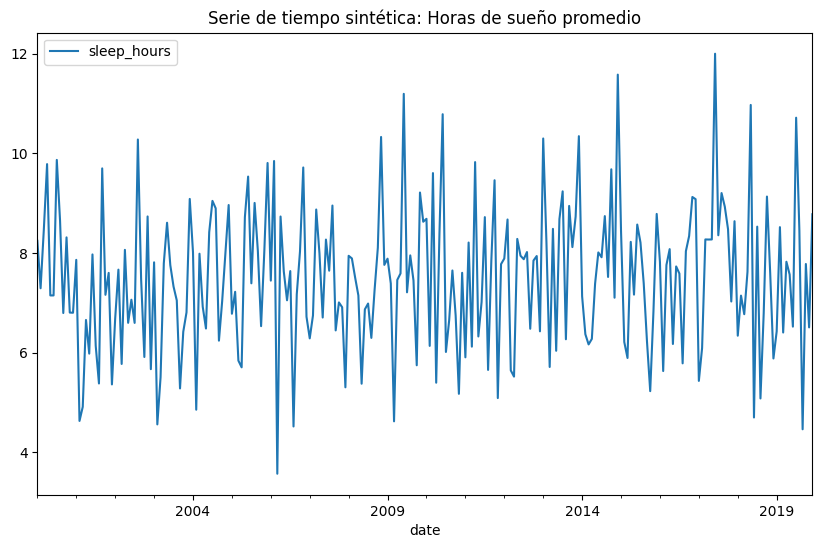

In [9]:
import numpy as np
import pandas as pd

# Parámetros para la simulación
np.random.seed(42)  # Fijar semilla para reproducibilidad
n_years = 20
months_per_year = 12
total_months = n_years * months_per_year

# Valores de la serie (en horas de sueño promedio)
mean_sleep = 7.5  # Promedio de horas de sueño
std_sleep = 1.5   # Desviación estándar

# Generar datos con distribución normal
sleep_data = np.clip(
    np.random.normal(loc=mean_sleep, scale=std_sleep, size=total_months),
    a_min=3, a_max=12  # Limitar a rango [3, 12]
)

# Crear un DataFrame con fechas y la serie de tiempo
date_range = pd.date_range(start="2000-01-01", periods=total_months, freq="M")
synthetic_data = pd.DataFrame({"date": date_range, "sleep_hours": sleep_data})

# Visualización inicial
print(synthetic_data.head())
synthetic_data.plot(x="date", y="sleep_hours", title="Serie de tiempo sintética: Horas de sueño promedio", figsize=(10, 6))

In [10]:
# Configurar el índice de fechas
synthetic_data['date'] = pd.to_datetime(synthetic_data['date'])
synthetic_data = synthetic_data.set_index('date')

sequence_length = 12  # Mantener consistencia con los datos mensuales

# Normalización
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
sleep_scaled = scaler.fit_transform(synthetic_data[['sleep_hours']].values)

# Crear secuencias
def create_sequences_synthetic(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        Y.append(data[i+seq_length])
    return np.array(X), np.array(Y)

X, Y = create_sequences_synthetic(sleep_scaled, sequence_length)

# División de datos en entrenamiento y prueba
split = int(0.8 * len(X))
X_train, Y_train = X[:split], Y[:split]
X_test, Y_test = X[split:], Y[split:]

# Convertir a tensores
X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.float32)

In [4]:
import torch
import math
import torch.nn as nn
from torch.optim import AdamW

In [52]:
class TimeSeriesTransformer(nn.Module):
    def __init__(self, input_dim, d_model, nhead, num_layers, seq_length, dropout=0.3):
        super(TimeSeriesTransformer, self).__init__()
        self.seq_length = seq_length
        self.encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model, 
            nhead=nhead, 
            dropout=dropout, 
            batch_first=True  # Asegura que el formato sea [batch_size, seq_len, d_model]
        )
        self.transformer = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)
        self.embedding = nn.Linear(input_dim, d_model)
        self.fc = nn.Linear(d_model, 1)
        self._create_positional_embeddings(seq_length, d_model)

    def _create_positional_embeddings(self, seq_length, d_model):
        position = torch.arange(0, seq_length).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * -(math.log(10000.0) / d_model))
        pos_embed = torch.zeros(seq_length, d_model)
        pos_embed[:, 0::2] = torch.sin(position * div_term)
        pos_embed[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer('position_embedding', pos_embed)

    def forward(self, x):
        if x.shape[1] != self.seq_length:
            raise ValueError(f"La secuencia de entrada tiene longitud {x.shape[1]}, pero se esperaba {self.seq_length}")
        x = self.embedding(x)
        x = x + self.position_embedding
        x = self.transformer(x)
        return self.fc(x[:, -1, :]).squeeze(-1)

In [55]:
# Definir el modelo, criterio, optimizador y scheduler
input_dim = 1  # Solo una característica (horas de sueño)
d_model = 64
nhead = 4
num_layers = 4
dropout = 0.3  # Incrementar dropout

model = TimeSeriesTransformer(input_dim, d_model, nhead, num_layers, sequence_length, dropout=dropout)

criterion = nn.MSELoss()
optimizer = AdamW(model.parameters(), lr=0.005, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=5
)

# Early Stopping
patience = 10
best_val_loss = np.inf
epochs_no_improve = 0

# Entrenamiento
num_epochs = 100
train_losses = []
val_losses = []

for epoch in range(num_epochs):  # Reducir número de épocas para simplificar
    model.train()
    train_loss = 0
    for X_batch, Y_batch in [(X_train, Y_train)]:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, Y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    # Validación
    model.eval()
    val_loss = 0
    with torch.no_grad():
        outputs = model(X_test)
        val_loss = criterion(outputs.squeeze(), Y_test.view(-1)).item()

    train_losses.append(train_loss / len(X_train))
    val_losses.append(val_loss / len(X_test))
    
    # Scheduler
    scheduler.step(val_losses[-1])
    
    # Early Stopping
    if val_losses[-1] < best_val_loss:
        best_val_loss = val_losses[-1]
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve == patience:
            print("Early stopping triggered")
            break

    print(f"Epoch {epoch+1}: Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")

/home/gmartinez/Deep-Learning-exercises/.venv/lib64/python3.12/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([182, 1])) that is different to the input size (torch.Size([182])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1: Train Loss: 0.0093, Val Loss: 0.3946
Epoch 2: Train Loss: 0.0727, Val Loss: 0.1833
Epoch 3: Train Loss: 0.0326, Val Loss: 0.0485
Epoch 4: Train Loss: 0.0091, Val Loss: 0.0268
Epoch 5: Train Loss: 0.0059, Val Loss: 0.0344
Epoch 6: Train Loss: 0.0077, Val Loss: 0.0272
Epoch 7: Train Loss: 0.0063, Val Loss: 0.0274
Epoch 8: Train Loss: 0.0055, Val Loss: 0.0354
Epoch 9: Train Loss: 0.0061, Val Loss: 0.0328
Epoch 10: Train Loss: 0.0059, Val Loss: 0.0275
Epoch 11: Train Loss: 0.0055, Val Loss: 0.0259
Epoch 12: Train Loss: 0.0055, Val Loss: 0.0252
Epoch 13: Train Loss: 0.0055, Val Loss: 0.0250
Epoch 14: Train Loss: 0.0056, Val Loss: 0.0249
Epoch 15: Train Loss: 0.0056, Val Loss: 0.0250
Epoch 16: Train Loss: 0.0056, Val Loss: 0.0250
Epoch 17: Train Loss: 0.0056, Val Loss: 0.0252
Epoch 18: Train Loss: 0.0055, Val Loss: 0.0256
Epoch 19: Train Loss: 0.0055, Val Loss: 0.0261
Epoch 20: Train Loss: 0.0054, Val Loss: 0.0267
Epoch 21: Train Loss: 0.0054, Val Loss: 0.0269
Epoch 22: Train Loss: 

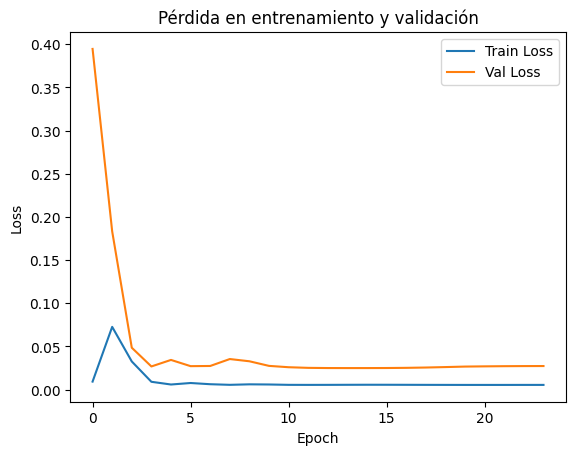

In [56]:
# Graficar pérdidas
import matplotlib.pyplot as plt
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.legend()
plt.xlabel('Epoch')  
plt.ylabel('Loss')
plt.title('Pérdida en entrenamiento y validación')
plt.show()

______________________

In [3]:
# Generar la serie sintética para frecuencia cardíaca promedio
np.random.seed(42)  # Reproducibilidad

# Asumiendo una relación inversa entre horas de sueño y frecuencia cardíaca
mean_heart_rate = 75 - (sleep_data - 7) * 5  # Relación inversa
std_dev_heart_rate = 5  # Variabilidad típica
heart_rate = mean_heart_rate + np.random.normal(0, std_dev_heart_rate, len(sleep_data))

# Limitar los valores dentro de un rango razonable (40 a 100 latidos por minuto)
heart_rate = np.clip(heart_rate, 40, 100)

# Crear un DataFrame con ambas series
data = pd.DataFrame({
    'Sleep Hours': sleep_data,
    'Heart Rate': heart_rate
})
print(data.head())

   Sleep Hours  Heart Rate
0     8.245071   71.258215
1     7.292604   72.845661
2     8.471533   70.880779
3     9.784545   68.692425
4     7.148770   73.085383


In [13]:
def create_sequences(input_data, output_data, sequence_length):
    """
    Crea secuencias de longitud fija a partir de series de tiempo.
    
    Parámetros:
        input_data (numpy.ndarray o torch.Tensor): Datos de entrada de la serie de tiempo, de tamaño [n_samples, n_features].
        output_data (numpy.ndarray o torch.Tensor): Datos de salida de la serie de tiempo, de tamaño [n_samples, n_targets].
        sequence_length (int): Longitud de la secuencia a usar.
    
    Devuelve:
        tuple: Dos arreglos (X, Y) donde:
            - X es de tamaño [n_sequences, sequence_length, n_features].
            - Y es de tamaño [n_sequences, n_targets].
    """
    X, Y = [], []
    for i in range(len(input_data) - sequence_length):
        seq_x = input_data[i:i+sequence_length]
        seq_y = output_data[i+sequence_length]
        X.append(seq_x)
        Y.append(seq_y)
    
    return np.array(X), np.array(Y)

In [14]:
X, Y = create_sequences(sleep_data.reshape(-1, 1), heart_rate.reshape(-1, 1), sequence_length)

# Dividir en conjuntos de entrenamiento y prueba
split = int(0.8 * len(X))
X_train, Y_train = X[:split], Y[:split]
X_test, Y_test = X[split:], Y[split:]

# Convertir a tensores de PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.float32)

In [15]:
class TimeSeriesTransformer(nn.Module):
    def __init__(self, input_dim, d_model, nhead, num_layers, seq_length):
        super(TimeSeriesTransformer, self).__init__()
        self.seq_length = seq_length
        self.encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model, 
            nhead=nhead, 
            dropout=0.2, 
            batch_first=True
        )
        self.transformer = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)
        self.embedding = nn.Linear(input_dim, d_model)
        self.fc = nn.Linear(d_model, 1)  # Salida de un solo valor (frecuencia cardíaca)
        self._create_positional_embeddings(seq_length, d_model)

    def _create_positional_embeddings(self, seq_length, d_model):
        position = torch.arange(0, seq_length).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * -(math.log(10000.0) / d_model))
        pos_embed = torch.zeros(seq_length, d_model)
        pos_embed[:, 0::2] = torch.sin(position * div_term)
        pos_embed[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer('position_embedding', pos_embed)

    def forward(self, x):
        if x.shape[1] != self.seq_length:
            raise ValueError(f"Longitud de la secuencia: {x.shape[1]}, se esperaba: {self.seq_length}")
        
        x = self.embedding(x)  # Proyección inicial a d_model
        x = x + self.position_embedding  # Agregar embeddings posicionales
        x = self.transformer(x)  # Salida del transformer
        return self.fc(x[:, -1, :]).squeeze(-1)  # Reducir dimensión extra para [batch_size]

In [19]:
input_dim = 1  # Una característica de entrada: horas de sueño
d_model = 128
nhead = 8
num_layers = 8

batch_size = 32

model = TimeSeriesTransformer(input_dim, d_model, nhead, num_layers, sequence_length)
criterion = nn.MSELoss()
optimizer = AdamW(model.parameters(), lr=0.01, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10)

# Configuración de Early Stopping
patience = 10
min_delta = 1e-4
best_val_loss = float('inf')
epochs_without_improvement = 0

# Entrenamiento
num_epochs = 100

# Entrenamiento (igual que antes)
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # Entrenamiento
    model.train()
    train_loss = 0
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i+batch_size]
        Y_batch = Y_train[i:i+batch_size]
        
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, Y_batch.view(-1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # Validación
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for i in range(0, len(X_test), batch_size):
            X_batch = X_test[i:i+batch_size]
            Y_batch = Y_test[i:i+batch_size]
            outputs = model(X_batch)
            loss = criterion(outputs, Y_batch.view(-1))
            val_loss += loss.item()

    # Scheduler
    scheduler.step(val_loss)

    # Early Stopping
    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1

    if epochs_without_improvement >= patience:
        print(f"Early stopping at epoch {epoch+1}")
        break

    train_losses.append(train_loss / len(X_train))
    val_losses.append(val_loss / len(X_test))
    scheduler.step(val_loss)
    
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")

Epoch 1/100, Train Loss: 143.9185, Val Loss: 155.0884
Epoch 2/100, Train Loss: 109.7324, Val Loss: 110.2715
Epoch 3/100, Train Loss: 74.9342, Val Loss: 66.2449
Epoch 4/100, Train Loss: 42.0989, Val Loss: 28.7288
Epoch 5/100, Train Loss: 16.6872, Val Loss: 6.1646
Epoch 6/100, Train Loss: 3.0664, Val Loss: 0.2713
Epoch 7/100, Train Loss: 0.4674, Val Loss: 2.2052
Epoch 8/100, Train Loss: 0.8234, Val Loss: 7.4759
Epoch 9/100, Train Loss: 0.9656, Val Loss: 2.2316
Epoch 10/100, Train Loss: 0.4071, Val Loss: 1.6769
Epoch 11/100, Train Loss: 0.3240, Val Loss: 3.0096
Epoch 12/100, Train Loss: 0.2657, Val Loss: 2.0983
Epoch 13/100, Train Loss: 0.2598, Val Loss: 1.6606
Epoch 14/100, Train Loss: 0.2749, Val Loss: 2.0514
Epoch 15/100, Train Loss: 0.2781, Val Loss: 2.3112
Early stopping at epoch 16


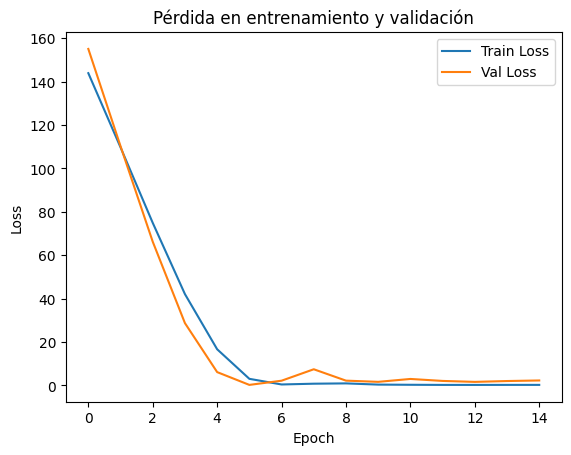

In [20]:
# Graficar pérdidas
import matplotlib.pyplot as plt
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.legend()
plt.xlabel('Epoch')  
plt.ylabel('Loss')
plt.title('Pérdida en entrenamiento y validación')
plt.show()